In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
comments = pd.read_csv("C:/Users/alice/OneDrive/Desktop/Jobs/Medium Size Data Projects/YoutubeTextDataAnalysis/GBcomments.csv", error_bad_lines = False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
# Textblob allows to extract what type of sentiment this comment has.
# polarity returns a number [-1, 1]. Positive # means a positive sentiment of the comment.
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [9]:
# check missing values of each column.
# 28 missing values for comment texts.
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [10]:
# drop all null values in the comment text
# inplace = True allows us to update the data frame.
comments.dropna(inplace=True)

In [11]:
# perform sentiment analysis on the comment text column
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)
    

In [12]:
comments['polarity'] = polarity
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [13]:
comments_positive=comments[comments['polarity'] == 1]

In [14]:
comments_positive.shape

(20400, 5)

In [15]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
# stopwords are a list of words that don't relate to sentiments
stopwords=set(STOPWORDS)

In [19]:
# store entire data into one big string
total_comments=' '.join(comments_positive['comment_text'])

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

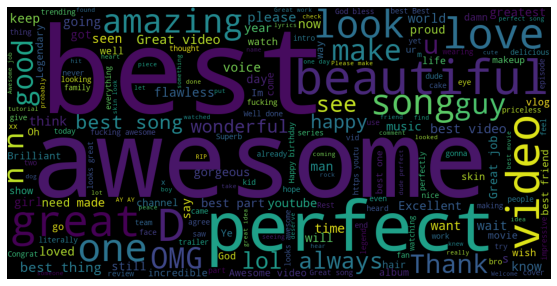

In [21]:
# set up wordcloud size and display positive sentiment wordcloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [22]:
comments_negative=comments[comments['polarity'] == -1]

In [23]:
total_comments=' '.join(comments_negative['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

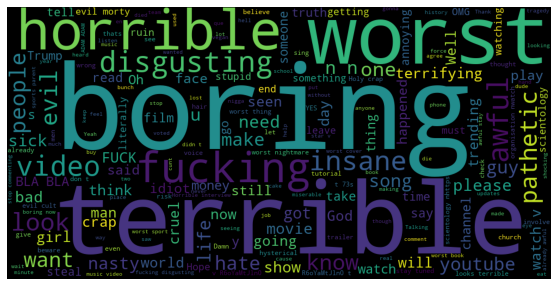

In [25]:
# generate negative sentiment word cloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [26]:
# analyze trending tags and views of youtube
# load video data 
videos = pd.read_csv("C:/Users/alice/OneDrive/Desktop/Jobs/Medium Size Data Projects/YoutubeTextDataAnalysis/USvideos.csv", error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [27]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [31]:
import re

In [34]:
tags_complete = ' '.join(videos['tags'])

In [35]:
# Use sub function to replace any special characters with a space 
tags = re.sub('[^a-zA-Z]',' ', tags_complete)

In [36]:
# replace extra space with one space in the text
tags = re.sub(' +', ' ',tags_complete)

In [37]:
wordcloud = WordCloud(width = 1000, height= 500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

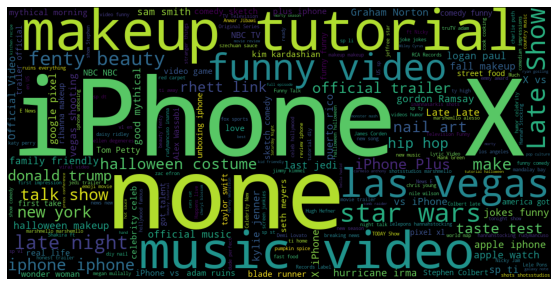

In [38]:
# generate tag wordcloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [39]:
# Next, i want to perform analysis on relationships between likes, dislikes, and views
# Use regression plot

Text(0.5, 1.0, 'Regression plot for views and likes')

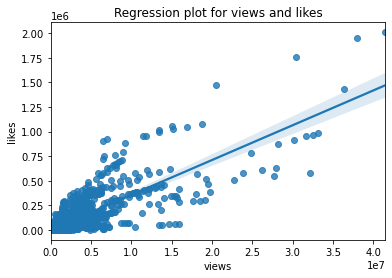

In [40]:
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression plot for views and likes')
# there is an increasing trend in dislikes when views are higher. 

Text(0.5, 1.0, 'Regression plot for views and dislikes')

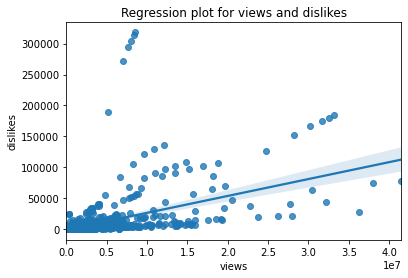

In [41]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression plot for views and dislikes')
# there is an increasing trend in dislikes when views are higher. 

In [42]:
# How are they correlated to each other?
df_corr = videos[['views','likes','dislikes']]
df_corr.corr()
# There is a strong positive correlation between views and likes, less strong correlation between views and dislikes.

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<AxesSubplot:>

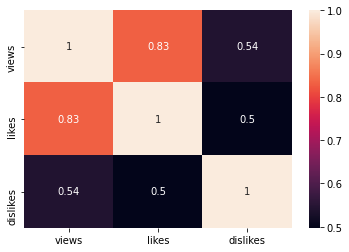

In [43]:
# Create a heatmap of the correlation with lables.
sns.heatmap(df_corr.corr(), annot=True)

In [44]:
# Next, we will perform an emoji analysis on the comments.

In [45]:
# install emoji library
!pip install emoji

In [46]:
import emoji
from emoji import UNICODE_EMOJI

In [47]:
# extract emoji from the entire data set by looping through comments
emoji_str=''
for i in comments['comment_text']:
    for c in i:
        if c in UNICODE_EMOJI['en']:
            emoji_str = emoji_str + c

In [50]:
# find the count of each emoji and return as a result
# set will return a set of unique emojis
result = {}
for i in set(emoji_str):
    result[i] = emoji_str.count(i)

In [80]:
# sort dictionary by frequency
final = {}
for key, value in sorted(result.items(), key = lambda item:item[1]):
    final[key]=value

In [86]:
# create a list of sorted emojis and a list of sorted frequency
keys = [*final.keys()]
values=[*final.values()]


In [87]:
# find the most used 20 emojis
df = pd.DataFrame({'char':keys[-20:], 'num':values[-20:]})
df

,char,num
0,🙌,2734
1,🏼,2961
2,💙,2968
3,💗,3071
4,👌,3534
5,💜,3616
6,🏻,4412
7,💖,4809
8,😊,4946
9,👏,5357


In [88]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [89]:
trace = go.Bar(x=df['char'], y=df['num'])
iplot([trace])

In [ ]:
# the most popular emojis are the crying face and the heart.